In [ ]:
import os
from utils import *
from plots import plot_runtime_comparison, plot_result_sizes_runtime_log, plot_octree_parallelization, plot_knn_comparison

BASE_DATA_PATH = os.path.join("..", "results")
OUTPUT_FOLDER = os.path.join("..", "out", "figures", "benchmarks")

DATA_SUBSET = os.path.join(BASE_DATA_PATH, "subset")
DATA_KNN_SUBSET = os.path.join(BASE_DATA_PATH, "knn_subset")
DATA_KNN_FULL = os.path.join(BASE_DATA_PATH, "knn_full")
DATA_FULL = os.path.join(BASE_DATA_PATH, "full")
DATA_PARALLEL_SUBSET = os.path.join(BASE_DATA_PATH, "parallel_subset")
DATA_PARALLEL_FULL = os.path.join(BASE_DATA_PATH, "parallel_full")

set_default_style()

In [ ]:
# Some constants
NEIGHBORS_PTR = "neighborsPtr"
NEIGHBORS = "neighbors"
NEIGHBORS_PRUNE = "neighborsPrune"
NEIGHBORS_STRUCT = "neighborsStruct"
MORTON_ENCODER = "MortonEncoder3D"
HILBERT_ENCODER = "HilbertEncoder3D"
NO_ENCODER = "NoEncoding"
LINEAR_OCTREE = "linOct"
POINTER_OCTREE = "ptrOct"
UNIBN_OCTREE = "unibnOctree"
PCL_KDTREE = "pclKD"
PCL_OCTREE = "pclOct"
NANOFLANN_KDTREE = "nanoKD"
NEIGHBORS_PCLOCT = "neighborsPclOct"
NEIGHBORS_PCLKD = "neighborsPclKD"
NEIGHBORS_UNIBN = "neighborsUnibn"
NEIGHBORS_NANOFLANN = "neighborsNanoflann"

In [ ]:
# This dicts store information about the type parameters and possible combinations used in each visualization, 
# along with the palette of colors
TYPES_INFO_OCTREE_ENCODER = {
    "type_parameters":  ['octree', 'encoder'],
    "available_types": pd.DataFrame({
        'octree': [ POINTER_OCTREE, POINTER_OCTREE, POINTER_OCTREE, LINEAR_OCTREE, LINEAR_OCTREE,],
        'encoder': [NO_ENCODER, MORTON_ENCODER, HILBERT_ENCODER, MORTON_ENCODER, HILBERT_ENCODER,]
    }),

    "palette": {
        (POINTER_OCTREE, NO_ENCODER): '#e1a692',
        (POINTER_OCTREE, MORTON_ENCODER): '#de6e56',
        (POINTER_OCTREE, HILBERT_ENCODER): '#c23728',
        (LINEAR_OCTREE, MORTON_ENCODER): '#63bff0',
        (LINEAR_OCTREE, HILBERT_ENCODER): '#1984c5',
    },
    "display_name" : {
        (POINTER_OCTREE, NO_ENCODER): r'\textit{poct\_none}',
        (LINEAR_OCTREE, MORTON_ENCODER): r'\textit{loct\_mort}',
        (POINTER_OCTREE, HILBERT_ENCODER): r'\textit{poct\_hilb}',
        (POINTER_OCTREE, MORTON_ENCODER): r'\textit{poct\_mort}',
        (LINEAR_OCTREE, HILBERT_ENCODER): r'\textit{loct\_hilb}',
    }
}

palette_ops = sns.color_palette("viridis", n_colors=4)
palette_structs = sns.dark_palette(palette_ops[3], n_colors=10, input="rgb")
sns.hls_palette()
TYPES_INFO_OPERATIONS = {
    "type_parameters":  ['octree', 'operation'],
    "available_types": pd.DataFrame({
        'octree': [POINTER_OCTREE, LINEAR_OCTREE, LINEAR_OCTREE, LINEAR_OCTREE],
        'operation': [NEIGHBORS_PTR, NEIGHBORS, NEIGHBORS_PRUNE, NEIGHBORS_STRUCT]
    }),

    "palette": {
        (POINTER_OCTREE, NEIGHBORS_PTR): palette_ops[0],
        (LINEAR_OCTREE, NEIGHBORS): palette_ops[1],
        (LINEAR_OCTREE, NEIGHBORS_PRUNE): palette_ops[2],
        (LINEAR_OCTREE, NEIGHBORS_STRUCT): palette_ops[3],
    },
    "display_name" : {
        (POINTER_OCTREE, NEIGHBORS_PTR): r'\textit{neighborsPtr}',
        (LINEAR_OCTREE, NEIGHBORS): r'\textit{neighbors}',
        (LINEAR_OCTREE, NEIGHBORS_PRUNE): r'\textit{neighborsPrune}',
        (LINEAR_OCTREE, NEIGHBORS_STRUCT): r'\textit{neighborsStruct}',
    }
}

TYPES_INFO_STRUCTURES = {
    "type_parameters":  ['octree', 'operation'],
    "available_types": pd.DataFrame({
        'octree': [LINEAR_OCTREE, UNIBN_OCTREE, PCL_OCTREE, PCL_KDTREE, NANOFLANN_KDTREE],
        'operation': [NEIGHBORS_STRUCT, NEIGHBORS_UNIBN, NEIGHBORS_PCLOCT, NEIGHBORS_PCLKD, NEIGHBORS_NANOFLANN]
    }),
    "markertype": {
        (LINEAR_OCTREE, NEIGHBORS_STRUCT): 'o',   # circle
        (UNIBN_OCTREE, NEIGHBORS_UNIBN): 'x',     # x marker
        (PCL_OCTREE, NEIGHBORS_PCLOCT): '*',       # star
        (PCL_KDTREE, NEIGHBORS_PCLKD): '^',       # triangle up
        (NANOFLANN_KDTREE, NEIGHBORS_NANOFLANN): 's',       # square
    },
    "palette": {
        (LINEAR_OCTREE, NEIGHBORS_STRUCT): palette_structs[9],
        (UNIBN_OCTREE, NEIGHBORS_UNIBN): palette_structs[7],
        (PCL_OCTREE, NEIGHBORS_PCLOCT): palette_structs[5],
        (PCL_KDTREE, NEIGHBORS_PCLKD): palette_structs[3],
        (NANOFLANN_KDTREE, NEIGHBORS_NANOFLANN): palette_structs[1],
    },
    "display_name" : {
        (LINEAR_OCTREE, NEIGHBORS_STRUCT): r'\textit{neighborsStruct}',
        (UNIBN_OCTREE, NEIGHBORS_UNIBN): r'\textit{unibnOctree}',
        (PCL_OCTREE, NEIGHBORS_PCLOCT): r'\textit{PCL Octree}',
        (PCL_KDTREE, NEIGHBORS_PCLKD): r'\textit{PCL KD-tree}',
        (NANOFLANN_KDTREE, NEIGHBORS_NANOFLANN): r'\textit{Nanoflann KD-tree}'
    }
}

TYPES_INFO_KNN = {
    "type_parameters":  ['octree'],
    "available_types": pd.DataFrame({
        'octree': [LINEAR_OCTREE, PCL_OCTREE, PCL_KDTREE, NANOFLANN_KDTREE],
    }),
    "markertype": {
        (LINEAR_OCTREE): 'o',   # circle
        (PCL_OCTREE): '*',       # star
        (PCL_KDTREE): '^',       # triangle up
        (NANOFLANN_KDTREE): 's',       # square
    },
    "palette": {
        (LINEAR_OCTREE): palette_structs[9],
        (PCL_OCTREE): palette_structs[5],
        (PCL_KDTREE): palette_structs[3],
        (NANOFLANN_KDTREE): palette_structs[1],
    },
    "display_name" : {
        (LINEAR_OCTREE): r'\textit{linOctKNN}',
        (PCL_OCTREE): r'\textit{pclOctKNN}',
        (PCL_KDTREE): r'\textit{pclKdKNN}',
        (NANOFLANN_KDTREE): r'\textit{nanoflannKNN}'
    }
}

In [ ]:
# Groups of datasets to use
CLOUDS_DATASETS = {
                    "Lille_0": "Paris_Lille", 
                    "Paris_Luxembourg_6": "Paris_Lille",
                    "5080_54400": "DALES"
                }
RADII = {0.5, 1.0, 2.0, 3.0}
CLOUDS_DATASETS_HIGH_DENSITY = {
                    "bildstein_station1_xyz_intensity_rgb": "Semantic3D",
                    "sg27_station8_intensity_rgb": "Semantic3D",
                    "Speulderbos_2017_TLS": "Speulderbos"
                }
RADII_HIGH_DENSITY = {0.01, 0.05, 0.1}
ALL_CLOUDS = CLOUDS_DATASETS.copy()
ALL_CLOUDS.update(CLOUDS_DATASETS_HIGH_DENSITY)

Loading latest file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv


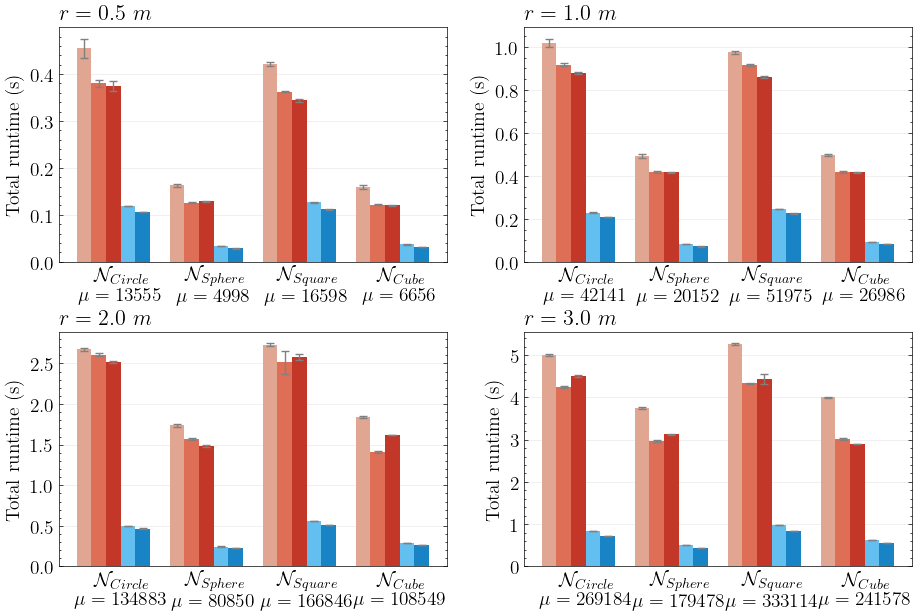

In [ ]:
# Paris_Luxembourg_6 SUBSETS
fig = plot_runtime_comparison(DATA_SUBSET, "Paris_Luxembourg_6", [NEIGHBORS_PTR, NEIGHBORS_PRUNE], TYPES_INFO_OCTREE_ENCODER, cols=2, figsz=(11,7))
output_fig(fig, OUTPUT_FOLDER, "paris_luxembourg_6_random")
display(fig)

Loading latest file: ../results/full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv


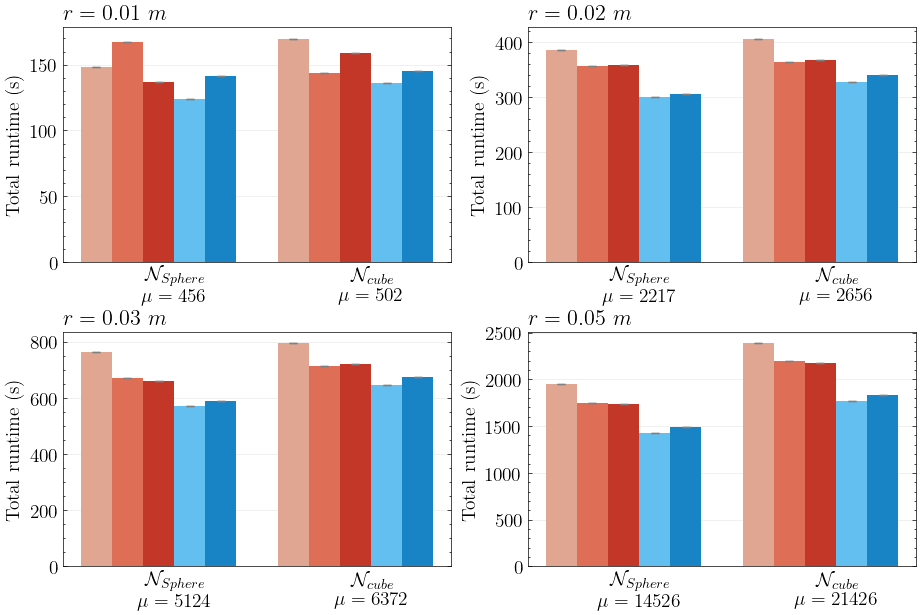

In [ ]:
# sg27 FULL
fig = plot_runtime_comparison(DATA_FULL, "sg27_station8_intensity_rgb", [NEIGHBORS_PTR, NEIGHBORS], TYPES_INFO_OCTREE_ENCODER, cols=2, figsz=(11,7))
output_fig(fig, OUTPUT_FOLDER, "sg27_full")
display(fig)

Loading latest file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading latest file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading latest file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading latest file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading latest file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading latest file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


/home/pablo/pablo-diaz/plots/plots.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/home/pablo/pablo-diaz/plots/plots.py:244: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


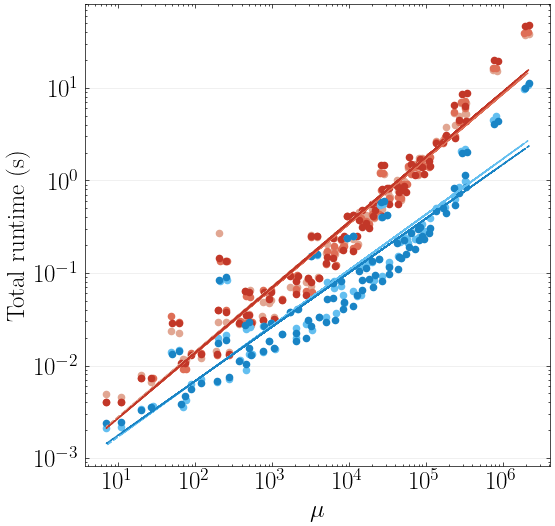

In [ ]:
# log-log SUBSETS
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, [NEIGHBORS_PTR, NEIGHBORS_PRUNE], TYPES_INFO_OCTREE_ENCODER)
output_fig(fig, OUTPUT_FOLDER, "loglog_random")
display(fig)

Loading latest file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading latest file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading latest file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading latest file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading latest file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading latest file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


/home/pablo/pablo-diaz/plots/plots.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/home/pablo/pablo-diaz/plots/plots.py:244: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


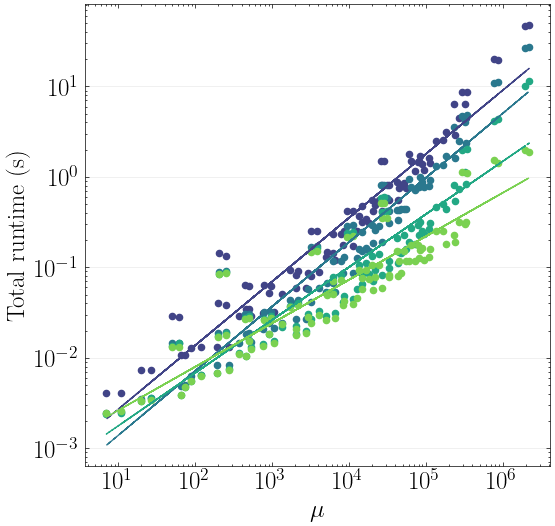

In [ ]:
# log-log SUBSETS
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, [NEIGHBORS_PTR, NEIGHBORS, NEIGHBORS_PRUNE, NEIGHBORS_STRUCT], 
                                TYPES_INFO_OPERATIONS, encoder=HILBERT_ENCODER)
output_fig(fig, OUTPUT_FOLDER, "loglog_random_algos")
display(fig)

Loading latest file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading latest file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading latest file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading latest file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading latest file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading latest file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


/home/pablo/pablo-diaz/plots/plots.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/home/pablo/pablo-diaz/plots/plots.py:244: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


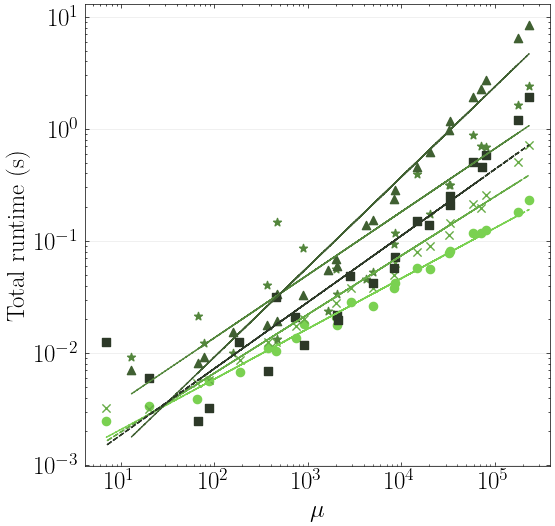

In [ ]:
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, 
                                [NEIGHBORS_PCLKD, NEIGHBORS_UNIBN, NEIGHBORS_STRUCT, NEIGHBORS_PCLOCT, NEIGHBORS_NANOFLANN], 
                                TYPES_INFO_STRUCTURES,
                                encoder=HILBERT_ENCODER, kernel="Sphere")
output_fig(fig, OUTPUT_FOLDER, "loglog_random_structures_sphere")
display(fig)

In [ ]:
def plot_all_heatmaps(data_path, cloud, save = False):
    source_str = "full" if data_path == DATA_PARALLEL_FULL else "subset"
    algos = [NEIGHBORS_PTR, NEIGHBORS, NEIGHBORS_PRUNE, NEIGHBORS_STRUCT, NEIGHBORS_NANOFLANN]
    for algo in algos:
        fig = plot_octree_parallelization(data_path, cloud, algo, True)
        print(algo)
        display(fig)
        if save:
            output_fig(fig, OUTPUT_FOLDER, f"parallel/{cloud}_parallel_{source_str}_{algo}")
        plt.close(fig)


Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPtr


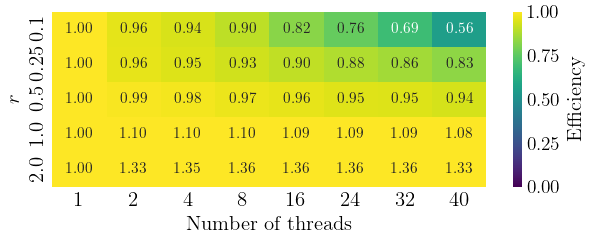

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighbors


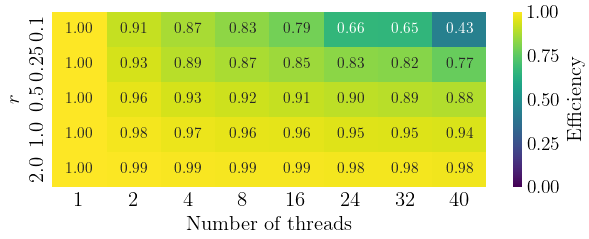

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPrune


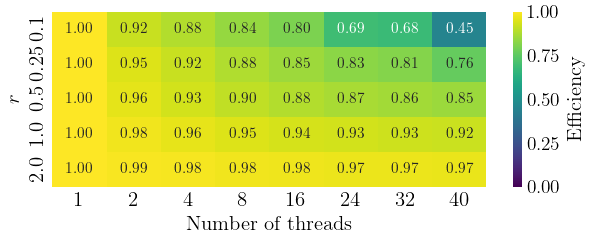

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsStruct


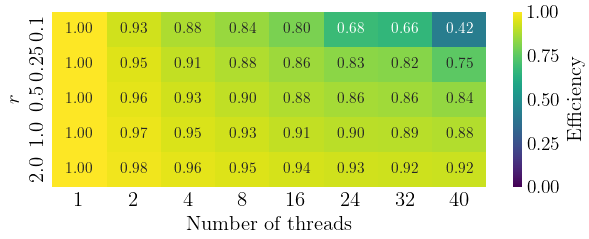

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsNanoflann


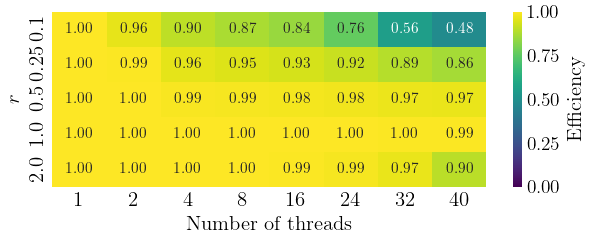

In [ ]:
# parallel SUBSETS
plot_all_heatmaps(DATA_PARALLEL_FULL, "Lille_0", True)

Loading latest file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsPtr


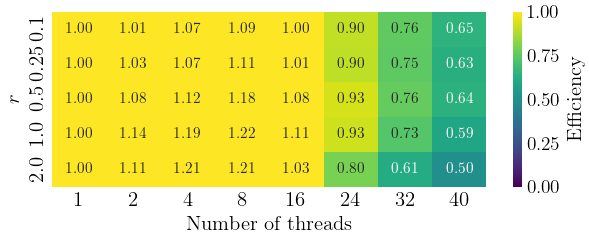

Loading latest file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighbors


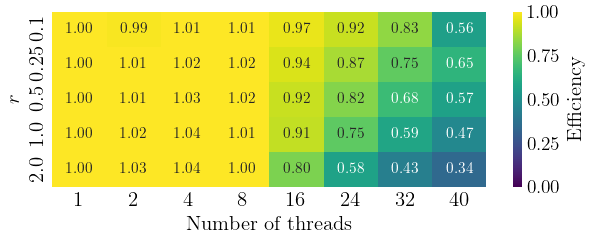

Loading latest file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsPrune


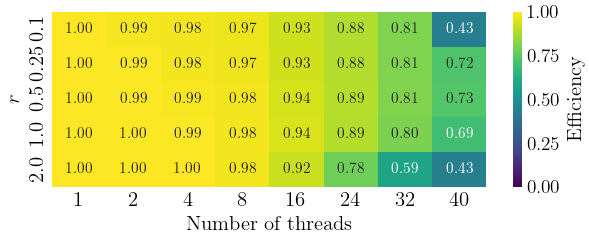

Loading latest file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsStruct


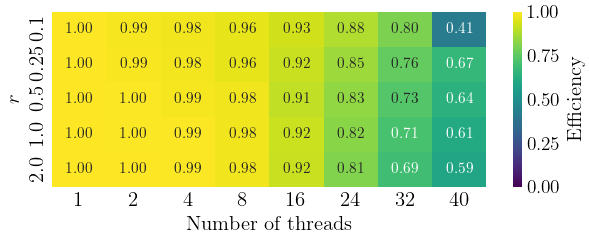

Loading latest file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsNanoflann


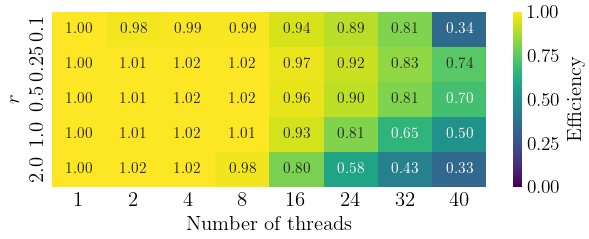

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "Paris_Luxembourg_6", True)

Loading latest file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsPtr


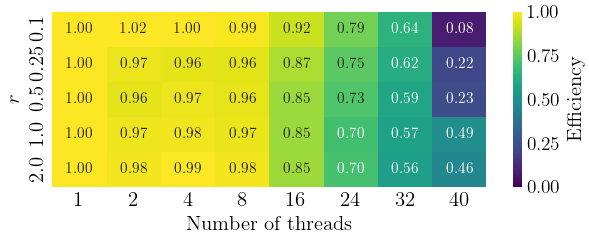

Loading latest file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighbors


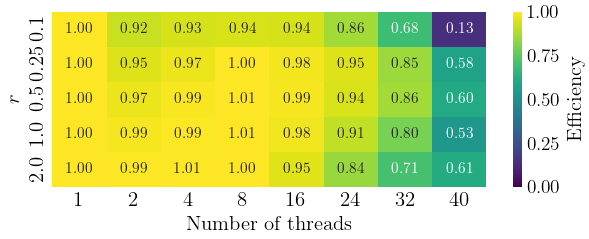

Loading latest file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsPrune


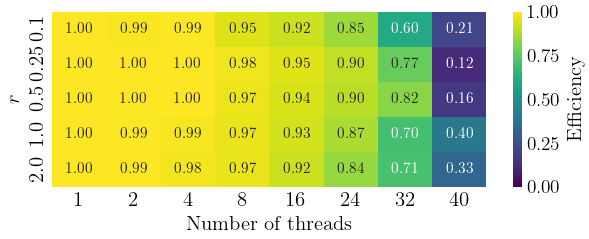

Loading latest file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsStruct


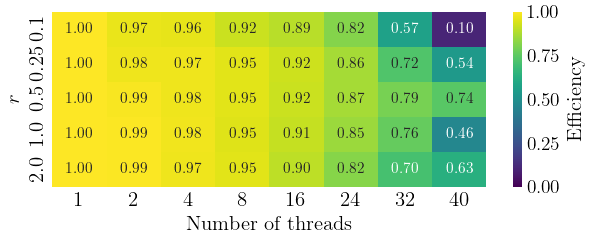

Loading latest file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsNanoflann


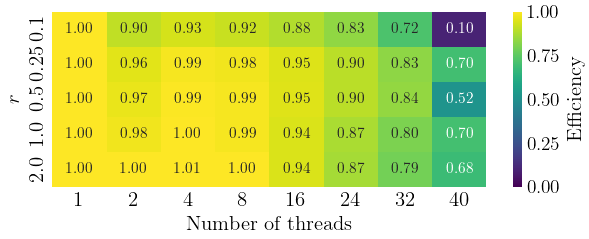

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "5080_54400", True)

Loading latest file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsPtr


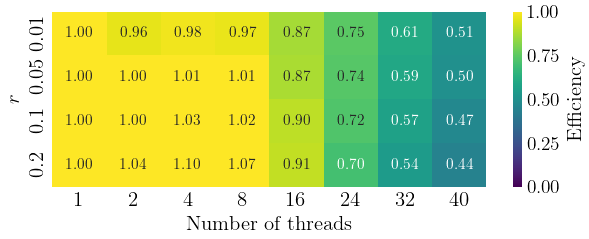

Loading latest file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighbors


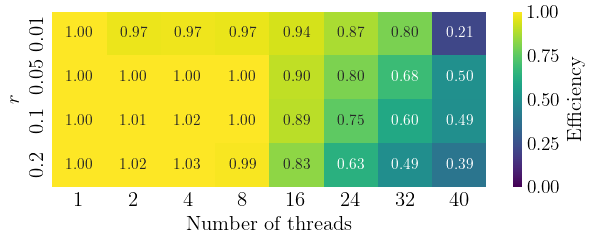

Loading latest file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsPrune


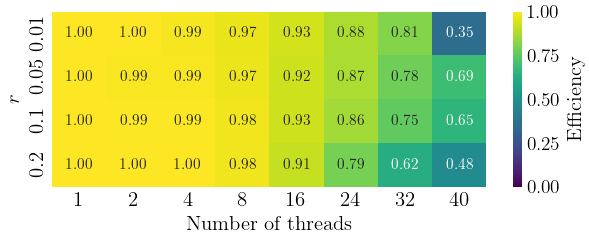

Loading latest file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsStruct


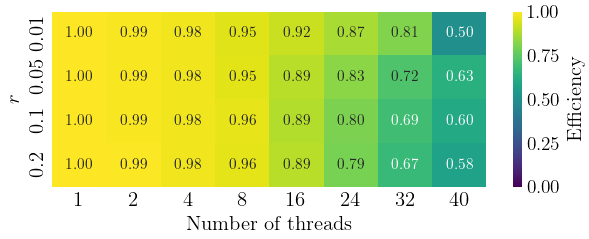

Loading latest file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsNanoflann


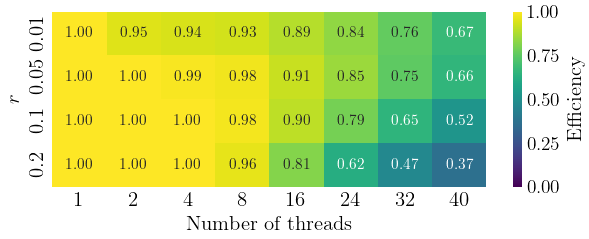

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "bildstein_station1_xyz_intensity_rgb", True)

Loading latest file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsPtr


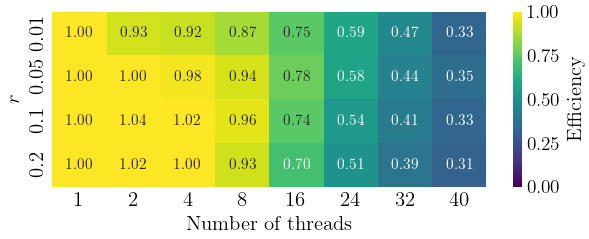

Loading latest file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighbors


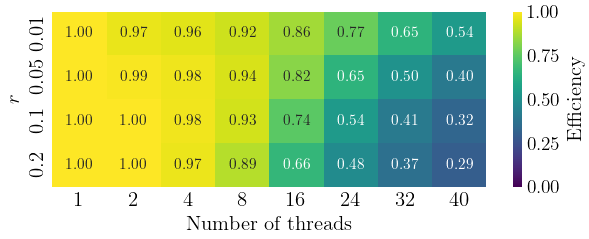

Loading latest file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsPrune


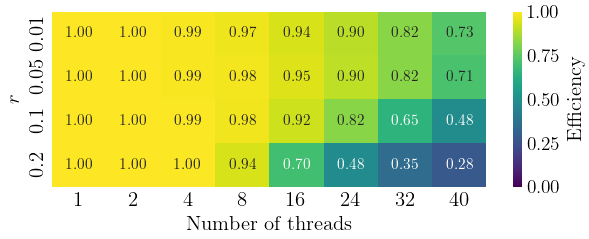

Loading latest file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsStruct


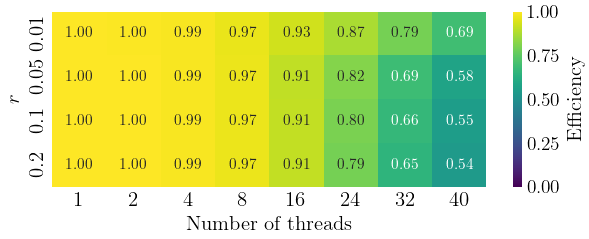

Loading latest file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsNanoflann


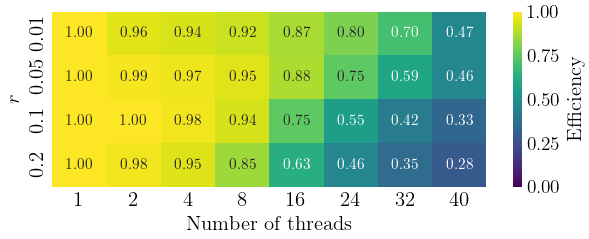

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "sg27_station8_intensity_rgb", True)

Loading latest file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsPtr


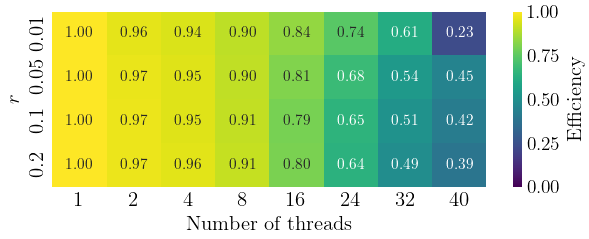

Loading latest file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighbors


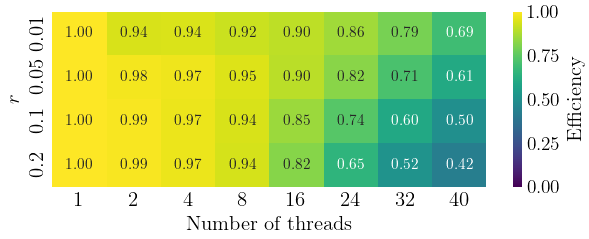

Loading latest file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsPrune


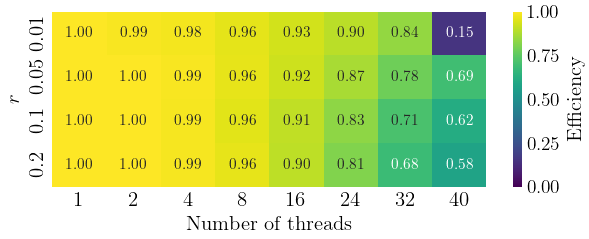

Loading latest file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsStruct


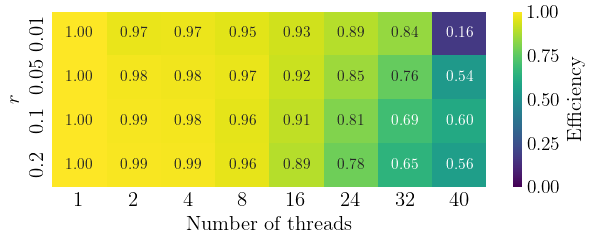

Loading latest file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsNanoflann


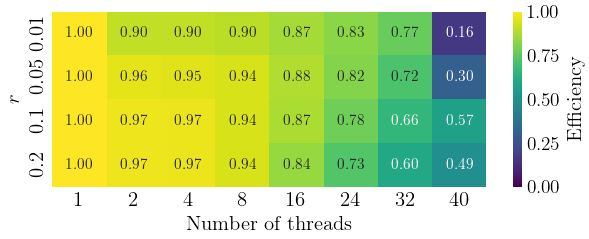

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "Speulderbos_2017_TLS", True)

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPtr


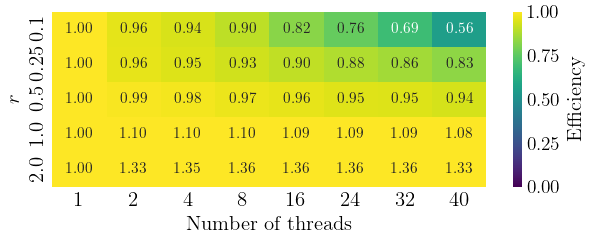

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighbors


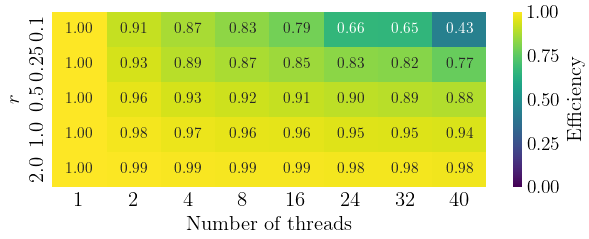

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPrune


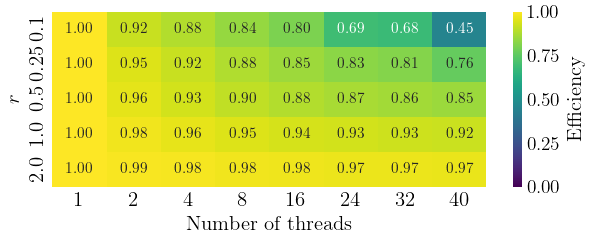

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsStruct


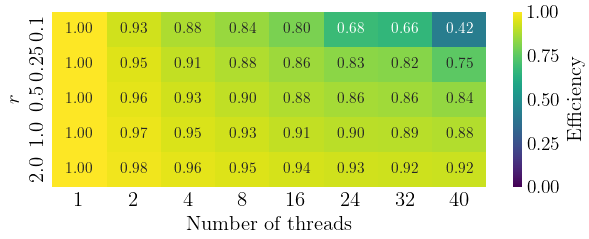

Loading latest file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsNanoflann


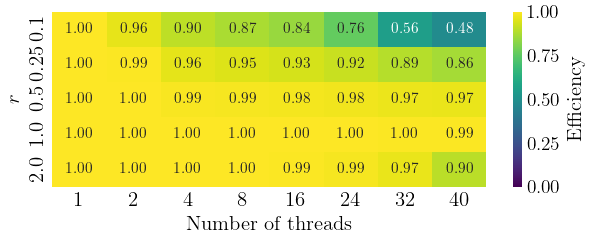

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_FULL, "Lille_0", True)

Loading latest file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv


KeyboardInterrupt: 

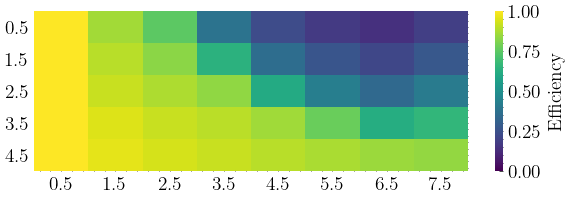

In [ ]:
plot_all_heatmaps(DATA_PARALLEL_FULL, "5080_54400", True)

In [ ]:

fig = plot_knn_comparison(DATA_KNN_SUBSET, "sg27_station8_intensity_rgb", TYPES_INFO_KNN, high_limit=300, 
                     struct_whitelist={NANOFLANN_KDTREE, PCL_KDTREE, LINEAR_OCTREE})
output_fig(fig, OUTPUT_FOLDER, "sg27_knn_random")
display(fig)

In [ ]:
fig = plot_knn_comparison(DATA_KNN_SUBSET, "Speulderbos_2017_TLS", TYPES_INFO_KNN, high_limit=300, 
                     struct_whitelist={NANOFLANN_KDTREE, PCL_KDTREE, LINEAR_OCTREE})
output_fig(fig, OUTPUT_FOLDER, "speulderbos_knn_random")
display(fig)

In [ ]:
fig = plot_knn_comparison(DATA_KNN_SUBSET, "Lille_0", TYPES_INFO_KNN, label_low_limit=100)
output_fig(fig, OUTPUT_FOLDER, "lille0_knn_random")
display(fig)

In [ ]:
fig = plot_knn_comparison(DATA_KNN_FULL, "sg27_station8_intensity_rgb", TYPES_INFO_KNN, label_low_limit=10)
output_fig(fig, OUTPUT_FOLDER, "sg27_knn_full")
display(fig)

In [ ]:
fig = plot_knn_comparison(DATA_KNN_FULL, "Paris_Luxembourg_6", TYPES_INFO_KNN, label_low_limit=10)
output_fig(fig, OUTPUT_FOLDER, "parislux6_knn_full")
display(fig)

In [ ]:
fig = plot_knn_comparison(DATA_KNN_FULL, "5080_54400", TYPES_INFO_KNN, label_low_limit=10)
output_fig(fig, OUTPUT_FOLDER, "5080_54400_knn_full")
display(fig)

In [ ]:
def table_speedup_vs_kdtree(data_path, clouds_datasets, kernel, operations, types_info=TYPES_INFO_STRUCTURES, encoder="all"):
    dfs = read_multiple_datasets(data_path, clouds_datasets)
    all_results = []

    # Identify structure keys
    pcloct_key = (PCL_OCTREE, NEIGHBORS_PCLOCT)

    # Define result size bins: [(min, max), ...]
    bins = [(10**i, 10**(i+2)) for i in range(0, 8, 2)]

    for bin_min, bin_max in bins:
        bin_results = []
        for j, (_, params) in enumerate(types_info["available_types"].iterrows()):
            key = tuple(params[col] for col in types_info["type_parameters"])
            runtimes = []

            for df_name, df in dfs.items():
                if df.empty:
                    continue
                if kernel == "all":
                    df = df[df['operation'].isin(operations)]
                else:
                    df = df[(df['kernel'] == kernel) & (df['operation'].isin(operations))]
                if encoder != "all":
                    df = df[df["encoder"] == encoder]

                struct_data = df[
                    (df[types_info["type_parameters"]] == pd.Series(key, index=types_info["type_parameters"])).all(axis=1)
                ]

                if struct_data.empty:
                    continue

                # Filter by result size bin
                struct_data = struct_data[
                    (struct_data["avg_result_size"] >= bin_min) & 
                    (struct_data["avg_result_size"] < bin_max)
                ]
                if struct_data.empty:
                    continue

                runtimes.extend(struct_data["mean"].tolist())

            avg_runtime = np.mean(runtimes) if runtimes else np.nan
            bin_results.append((key, avg_runtime))

        # Find KDTree runtime in this bin
        kdtree_runtime = next((r for (k, r) in bin_results if k == pcloct_key), np.nan)
        print(bin_results)
        print(kdtree_runtime)
        # Collect table data for the bin
        for key, runtime in bin_results:
            if np.isnan(runtime) or np.isnan(kdtree_runtime):
                speedup = np.nan
            else:
                speedup = kdtree_runtime / runtime
            label = types_info["display_name"].get(key, str(key))
            all_results.append({
                "Size Range": f"{bin_min:.0e}–{bin_max:.0e}",
                "Structure": label,
                "Average Runtime (ms)": f"{runtime:.2f}" if not np.isnan(runtime) else "N/A",
                "Speedup vs. KDTree": f"{speedup:.2f}×" if not np.isnan(speedup) else "N/A"
            })

    return pd.DataFrame(all_results).sort_values(
        by=["Size Range", "Speedup vs. KDTree"], ascending=[True, False]
    )

In [ ]:
# Hilbert 
table_speedup_vs_kdtree(DATA_FULL, ALL_CLOUDS, "Sphere", [NEIGHBORS_PCLKD, NEIGHBORS_UNIBN, NEIGHBORS_STRUCT, NEIGHBORS_PCLOCT, NEIGHBORS_NANOFLANN], encoder=HILBERT_ENCODER)


In [ ]:
# Morton
table_speedup_vs_kdtree(DATA_FULL, ALL_CLOUDS, "Sphere", [NEIGHBORS_PCLKD, NEIGHBORS_UNIBN, NEIGHBORS_STRUCT, NEIGHBORS_PCLOCT, NEIGHBORS_NANOFLANN], encoder=MORTON_ENCODER)